In [308]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
from correlation import *
import matplotlib.pyplot as plt
from NAN_Pattern_Decomposition import decompose_dataset_according_to_NAN_pattern
from Train_set_preparation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load Data

In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=False)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (250000,)
X has shape (250000, 30)


# Divide Dataset according to NAN

In [3]:
tx_nan = transform_to_nan(tx, -900)

In [4]:
tx_less_22,  = transform_column_22_and_delete(tx_nan)

In [136]:
p0_ind, p0, y0, p1_ind, p1, y1, p2_ind, p2, y2, p3_ind, p3, y3 = decompose_dataset_according_to_NAN_pattern(tx_nan, y)

In [223]:
p0_22, mat0_22 = feature_22_to_matrix(p0)
p1_22, mat1_22 = feature_22_to_matrix(p1)
p2_22, mat2_22 = feature_22_to_matrix(p2)
p3_22, mat3_22 = feature_22_to_matrix(p3)

mat0_22[:,-2:], mean, std = standardize(mat0_22[:,-2:])
mat1_22[:,-3:], mean, std = standardize(mat1_22[:,-3:])

In [138]:
p0_processed = p0_22

feature_nans_1 = [0]
p1_processed = remove_constant_features(p1_22, feature_nans_1)

feature_nans_2 = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27]
p2_processed = remove_constant_features(p2_22, feature_nans_2)

feature_nans_3 = [4, 5, 6, 12, 25, 26, 27]
p3_processed = remove_constant_features(p3_22, feature_nans_3)

In [139]:
p0_nan_mean, p0_mean =transform_to_mean(p0_processed)
p1_nan_mean, p1_mean =transform_to_mean(p1_processed)
p2_nan_mean, p2_mean =transform_to_mean(p2_processed)
p3_nan_mean, p3_mean =transform_to_mean(p3_processed)

p0_nan_mean_moins = remove_constant_features(p0_nan_mean, [29, 30])
p1_nan_mean_moins = remove_constant_features(p1_nan_mean, [])
p2_nan_mean_moins = remove_constant_features(p2_nan_mean, [18, 19, 20, 21, 22])
p3_nan_mean_moins = remove_constant_features(p3_nan_mean, [22, 23, 24, 25])

## Feature engineering

### P0

In [402]:
feature0_square = [6]
feature0_log = [0,1,2,3,5,6,8,10,13,16,19,22,25,28]
feature0_cos = []
feature0_sin = [11,12,17]
feature0_sqrt = [4]

p0_basic_transform, min_log0, min_sqrt0 = basic_features_process(p0_nan_mean_moins, 
                                                                 feature0_square, 
                                                                 feature0_log, 
                                                                 feature0_sin,
                                                                 feature0_cos,
                                                                 feature0_sqrt)

### P1

In [403]:
feature1_square = []
feature1_log = [0,1,2,6,7,8,9,10,12,15,18,20,22,21,27]
feature1_cos = []
feature1_sin = []
feature1_sqrt = []

p1_basic_transform, min_log1, min_sqrt1 = basic_features_process(p1_nan_mean_moins, 
                                                                 feature1_square, 
                                                                 feature1_log, 
                                                                 feature1_sin,
                                                                 feature1_cos,
                                                                 feature1_sqrt)

### P2

In [404]:
feature2_square = []
feature2_log = [0,2,3,5,6,9,12,15,17]
feature2_cos = []
feature2_sin = [8]
feature2_sqrt = [4, 7]

p2_basic_transform, min_log2, min_sqrt2 = basic_features_process(p2_nan_mean_moins, 
                                                                 feature2_square, 
                                                                 feature2_log, 
                                                                 feature2_sin,
                                                                 feature2_cos,
                                                                 feature2_sqrt)

### P3

In [405]:
feature3_square = []
feature3_log = [0,2,3,6,7,9,12,15,17,18,21]
feature3_cos = [4]
feature3_sin = [8]
feature3_sqrt = [1,5]

p3_basic_transform, min_log3, min_sqrt3 = basic_features_process(p3_nan_mean_moins, 
                                                                 feature3_square, 
                                                                 feature3_log, 
                                                                 feature3_sin,
                                                                 feature3_cos,
                                                                 feature3_sqrt)

# PCA

In [406]:
def PCA(tx):
    M0 = np.mean(tx, axis = 0)
    tx_centered = tx - M0
    V0 = np.cov(tx_centered.T)
    values, vectors = np.linalg.eig(V0)
    return vectors, values

In [429]:
def transform_PCA_matrix_features0(tx, mat_22):
    
    nb_features = tx.shape[1]
    
    tx = create_product_with_vector(tx, 'all', mat_22[:,2])
    tx = transform_feature_power(tx, list(range(nb_features)), 2, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 3, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 4, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 5, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 6, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 7, False)
    tx = create_product_with_vector(tx, np.delete(list(range(29)), 2), tx[:,2])
    tx = create_product_with_vector(tx, np.delete(list(range(29)), 3), tx[:,3])
    tx = create_product_with_vector(tx, np.delete(list(range(29)), 4), tx[:,4])
    tx = create_product_with_vector(tx, np.delete(list(range(29)), 6), tx[:,6])
    
    tx = add_first_feature_column(tx)
    
    return tx

def transform_PCA_matrix_features1(tx, mat_22):
    
    nb_features = tx.shape[1]
    
    tx = create_product_with_vector(tx, 'all', mat_22[:,1])
    tx = transform_feature_power(tx, list(range(nb_features)), 2, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 3, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 4, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 5, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 6, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 7, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 8, False)
    
    tx = add_first_feature_column(tx)
    
    return tx

def transform_PCA_matrix_features2(tx):
    
    nb_features = tx.shape[1]
    
    tx = transform_feature_power(tx, list(range(nb_features)), 2, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 3, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 4, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 5, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 6, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 7, False)
    
    tx = create_product_with_vector(tx, np.delete(list(range(18)), 0), tx[:,0])
    tx = create_product_with_vector(tx, np.delete(list(range(18)), 1), tx[:,1])
    tx = create_product_with_vector(tx, np.delete(list(range(18)), 2), tx[:,2])
    tx = create_product_with_vector(tx, np.delete(list(range(18)), 3), tx[:,3])
    tx = add_first_feature_column(tx)
    
    return tx

def transform_PCA_matrix_features3(tx):
    
    nb_features = tx.shape[1]
    
    tx = transform_feature_power(tx, list(range(nb_features)), 2, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 3, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 4, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 5, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 6, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 7, False)
    tx = transform_feature_power(tx, list(range(nb_features)), 8, False)

    
    tx = create_product_with_vector(tx, np.delete(list(range(22)), 0), tx[:,0])
    tx = create_product_with_vector(tx, np.delete(list(range(22)), [1, 3]), tx[:,1])
    tx = create_product_with_vector(tx, np.delete(list(range(22)), [1, 3]), tx[:,3])
    tx = create_product_with_vector(tx, np.delete(list(range(22)), 10), tx[:,9])
    tx = add_first_feature_column(tx)
    
    return tx

In [408]:
def correlation_matrix(corr):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow((np.abs(corr)), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(list(range(corr.shape[1])),fontsize=6)
    ax1.set_yticklabels(list(range(corr.shape[1])),fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

### P0

In [409]:
p0_basic_transform.shape

(68114, 29)

In [410]:
vectors0, values0 = PCA(p0_basic_transform)

We keep a subset of the projected features

In [411]:
P0 = vectors0.T.dot(p0_basic_transform.T).T

In [414]:
P0_poly = transform_PCA_matrix_features0(P0, mat0_22)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


### P1

In [415]:
vectors1, values1 = PCA(p1_basic_transform)

In [416]:
P1 = vectors1.T.dot(p1_basic_transform.T).T

In [419]:
P1_poly = transform_PCA_matrix_features1(P1, mat1_22)

### P2

In [420]:
vectors2, values2 = PCA(p2_basic_transform)

In [421]:
P2 = vectors2.T.dot(p2_basic_transform.T).T

In [423]:
P2_poly = transform_PCA_matrix_features2(P2)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


### P3

In [424]:
vectors3, values3 = PCA(p3_basic_transform)

In [425]:
P3 = vectors3.T.dot(p3_basic_transform.T).T

In [426]:
P3.shape

(69982, 22)

In [430]:
P3_poly = transform_PCA_matrix_features3(P3)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


# TRAIN

In [431]:
from train_model import *

In [432]:
print("P0 : {0}".format(P0_poly.shape))
print("P1 : {0}".format(P1_poly.shape))
print("P2 : {0}".format(P2_poly.shape))
print("P3 : {0}".format(P3_poly.shape))

P0 : (68114, 345)
P1 : (38114, 253)
P2 : (73790, 195)
P3 : (69982, 259)


### P0

Ridge Resgression, Loss : 0.7, Lambda : 7.278953843983161


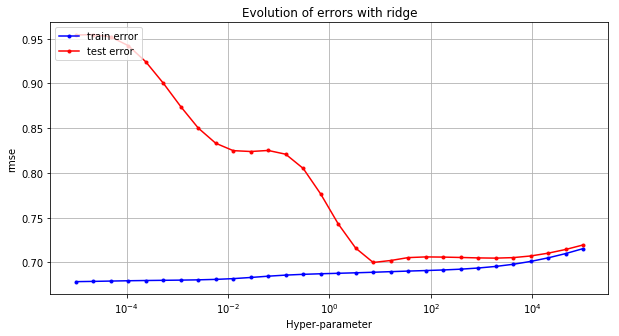

In [434]:
ridge_regression_exploration(y0, P0_poly, 0.8, np.logspace(-5, 5, 30))

In [435]:
ws0_ridge = ridge_regression_cross_validation(P0_poly, y0, 0.8, 4, 1e1)

Accuracy : 0.7718; Loss 0.6886
Accuracy : 0.7682; Loss 0.6868
Accuracy : 0.7696; Loss 0.6886
Accuracy : 0.7792; Loss 0.6926
Cross-Validation, Accuracy : 0.779; Loss 0.6908


### P1

Ridge Resgression, Loss : 0.251, Lambda : 1000.0


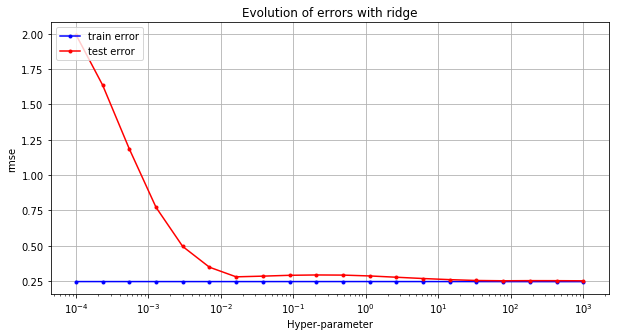

In [436]:
ridge_regression_exploration(y1, P1_poly, 0.8, np.logspace(-4, 3, 20))

In [437]:
ws1_ridge = ridge_regression_cross_validation(P1_poly, y1, 0.8, 4, 1e2)

Accuracy : 0.9298; Loss 0.2427
Accuracy : 0.9315; Loss 0.2444
Accuracy : 0.9395; Loss 0.2512
Accuracy : 0.9306; Loss 0.2433
Cross-Validation, Accuracy : 0.9344; Loss 0.245


### P2

Ridge Resgression, Loss : 0.592, Lambda : 29.76351441631316


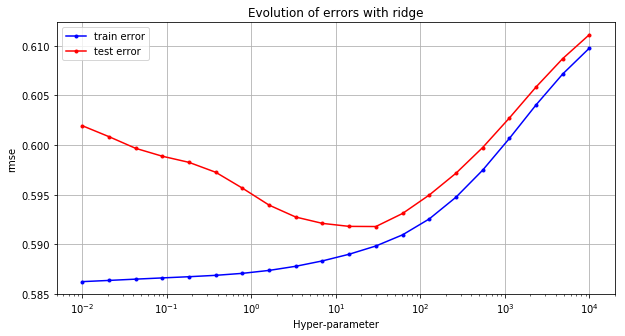

In [438]:
ridge_regression_exploration(y2, P2_poly, 0.8, np.logspace(-2, 4, 20))

In [447]:
ws2_ridge = ridge_regression_cross_validation(P2_poly, y2, 0.8, 4, 16)

Accuracy : 0.7968; Loss 0.587
Accuracy : 0.7987; Loss 0.5891
Accuracy : 0.8017; Loss 0.5898
Accuracy : 0.8044; Loss 0.5906
Cross-Validation, Accuracy : 0.8006; Loss 0.6693


### P3

Ridge Resgression, Loss : 0.726, Lambda : 112.88378916846884


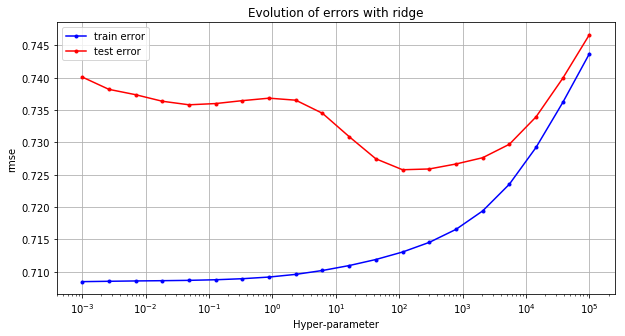

In [448]:
ridge_regression_exploration(y3, P3_poly, 0.8, np.logspace(-3, 5, 20))

In [452]:
ws3_ridge = ridge_regression_cross_validation(P3_poly, y3, 0.8, 4, 1e-2)

Accuracy : 0.7551; Loss 0.7067
Accuracy : 0.7599; Loss 0.7081
Accuracy : 0.7616; Loss 0.7108
Accuracy : 0.762; Loss 0.7088
Cross-Validation, Accuracy : 0.7535; Loss 0.7172


# TEST

In [453]:
y_te, tx_te, ids_te = load_csv_data("data_csv/test.csv", sub_sample=False)
print("y has shape {0}".format(y_te.shape))
print("X has shape {0}".format(tx_te.shape))

y has shape (568238,)
X has shape (568238, 30)


In [454]:
tx_te_nan = transform_to_nan(tx_te, -900)
tx_te_less_22  = transform_column_22_and_delete(tx_te_nan)
p0_te_ind, p0_te, y0_te, p1_te_ind, p1_te, y1_te, p2_te_ind, p2_te, y2_te, p3_te_ind, p3_te, y3_te = decompose_dataset_according_to_NAN_pattern(tx_te_nan, y_te)

In [455]:
p0_te_22, mat0_te_22 = feature_22_to_matrix(p0_te)
p1_te_22, mat1_te_22 = feature_22_to_matrix(p1_te)
p2_te_22, mat2_te_22 = feature_22_to_matrix(p2_te)
p3_te_22, mat3_te_22 = feature_22_to_matrix(p3_te)

mat0_te_22[:,-2:], mean, std = standardize(mat0_te_22[:,-2:])
mat1_te_22[:,-3:], mean, std = standardize(mat1_te_22[:,-3:])

In [456]:
p0_te_22.shape

(155460, 29)

In [457]:
p0_te_processed = p0_te_22

feature_nans_1 = [0]
p1_te_processed = remove_constant_features(p1_te_22, feature_nans_1)

feature_nans_2 = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27]
p2_te_processed = remove_constant_features(p2_te_22, feature_nans_2)

feature_nans_3 = [4, 5, 6, 12, 25, 26, 27]
p3_te_processed = remove_constant_features(p3_te_22, feature_nans_3)

In [458]:
p0_te_nan_mean = transform_feature_to_mean_given_training(p0_te_processed, p0_mean)
p1_te_nan_mean = transform_feature_to_mean_given_training(p1_te_processed, p1_mean)
p2_te_nan_mean = transform_feature_to_mean_given_training(p2_te_processed, p2_mean)
p3_te_nan_mean = transform_feature_to_mean_given_training(p3_te_processed, p3_mean)

p0_te_nan_mean_moins = remove_constant_features(p0_te_nan_mean, [29, 30])
p1_te_nan_mean_moins = remove_constant_features(p1_te_nan_mean, [])
p2_te_nan_mean_moins = remove_constant_features(p2_te_nan_mean, [18, 19, 20, 21, 22])
p3_te_nan_mean_moins = remove_constant_features(p3_te_nan_mean, [22, 23, 24, 25])

# Perform basic operations

### P0

In [459]:
p0_te_basic_transform, min_log0, min_sqrt0 = basic_features_process(p0_te_nan_mean_moins, 
                                                                 feature0_square, 
                                                                 feature0_log, 
                                                                 feature0_sin,
                                                                 feature0_cos,
                                                                 feature0_sqrt)

### P1

In [460]:
p1_te_basic_transform, min_log1, min_sqrt1 = basic_features_process(p1_te_nan_mean_moins, 
                                                                 feature1_square, 
                                                                 feature1_log, 
                                                                 feature1_sin,
                                                                 feature1_cos,
                                                                 feature1_sqrt)

### P2

In [461]:
p2_te_basic_transform, min_log2, min_sqrt2 = basic_features_process(p2_te_nan_mean_moins, 
                                                                 feature2_square, 
                                                                 feature2_log, 
                                                                 feature2_sin,
                                                                 feature2_cos,
                                                                 feature2_sqrt)

### P3

In [462]:
p3_te_basic_transform, min_log3, min_sqrt3 = basic_features_process(p3_te_nan_mean_moins, 
                                                                 feature3_square, 
                                                                 feature3_log, 
                                                                 feature3_sin,
                                                                 feature3_cos,
                                                                 feature3_sqrt)

# Project on PCA

In [464]:
P0_te = vectors0.T.dot(p0_te_basic_transform.T).T

P0_te_poly = transform_PCA_matrix_features0(P0_te, mat0_te_22)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


### P1

In [465]:
P1_te = vectors1.T.dot(p1_te_basic_transform.T).T

P1_te_poly = transform_PCA_matrix_features1(P1_te, mat1_te_22)

### P2

In [466]:
P2_te = vectors2.T.dot(p2_te_basic_transform.T).T

P2_te_poly = transform_PCA_matrix_features2(P2_te)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


### P3

In [467]:
P3_te = vectors3.T.dot(p3_te_basic_transform.T).T

P3_te_poly = transform_PCA_matrix_features3(P3_te)

/home/hadrien/ML/local/projects/project1/Train_set_preparation.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if features == 'all':


# Predict

In [468]:
labels0 = predict_labels(ws0_ridge, P0_te_poly)
labels1 = predict_labels(ws1_ridge, P1_te_poly)
labels2 = predict_labels(ws2_ridge, P2_te_poly)
labels3 = predict_labels(ws3_ridge, P3_te_poly)

labels = np.nan*np.zeros(tx_te.shape[0])
labels[p0_ind_te] = labels0
labels[p1_ind_te] = labels1
labels[p2_ind_te] = labels2
labels[p3_ind_te] = labels3

In [469]:
### check all values are assigned correctly
np.count_nonzero(np.isnan(labels))

0

# Create CSV

In [470]:
### We aim to categorize that much sample as NON-HIGGS
print("We have {0}% non higgs samples, we aim for 65%.".format( round(np.count_nonzero(labels[labels == -1])/tx_te.shape[0]*100), 2))

We have 71% non higgs samples, we aim for 65%.


In [472]:
create_csv_submission(ids_te, labels, '12eme')